In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
np.set_printoptions(precision=3,suppress=True)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
path = 'E:\\python_projects\\Springboard\\datasets\\auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(path, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [3]:
df=raw_dataset.copy()

Check for null rows

In [4]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
df['Origin'].unique()

array([1, 3, 2], dtype=int64)

In [6]:
df['Origin']=df['Origin'].map({1:'USA',2:'Europe',3:'Japan'})
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA


In [7]:
df['Origin'].value_counts()

USA       245
Japan      79
Europe     68
Name: Origin, dtype: int64

In [8]:
df=pd.get_dummies(data=df,prefix='',prefix_sep='',columns=['Origin'])


In [9]:
#Split data into train and test sets
df_train=df.sample(frac=0.8)
df_test=df.drop(df_train.index)


In [10]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Europe', 'Japan', 'USA'],
      dtype='object')

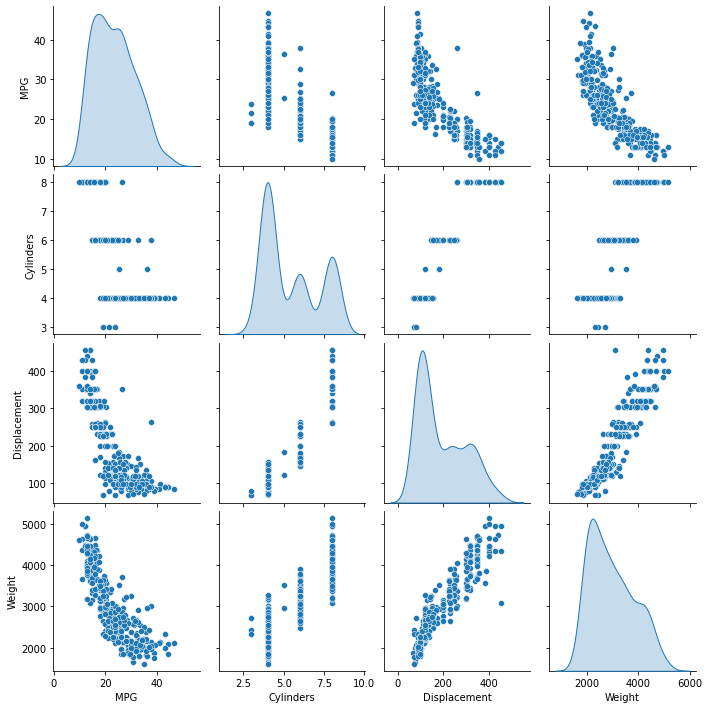

In [11]:
sns.pairplot(df_train[['MPG', 'Cylinders', 'Displacement', 'Weight']],diag_kind='kde')

In [12]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.581529,7.926647,10.0,17.000,23.0,29.000,46.6
Cylinders,314.0,5.461783,1.712612,3.0,4.000,4.0,8.000,8.0
Displacement,314.0,193.361465,104.455139,68.0,101.750,146.0,302.000,455.0
Horsepower,314.0,104.229299,37.881162,46.0,75.250,95.0,129.750,225.0
Weight,314.0,2969.111465,855.997311,1613.0,2220.000,2803.5,3612.000,5140.0
Acceleration,314.0,15.488535,2.728350,8.0,13.625,15.5,17.175,24.8
Model Year,314.0,75.882166,3.624835,70.0,73.000,76.0,79.000,82.0
Europe,314.0,0.181529,0.386071,0.0,0.000,0.0,0.000,1.0
Japan,314.0,0.203822,0.403481,0.0,0.000,0.0,0.000,1.0
USA,314.0,0.614650,0.487455,0.0,0.000,1.0,1.000,1.0


In [13]:
#separate out labels from featues in separate dataframes
df_train_X=df_train.copy()
df_train_y=df_train_X.pop('MPG')
df_test_X=df_test.copy()
df_test_y=df_test_X.pop('MPG')

### Normalization

In [14]:
#based on the mean,min,max values the scales used for the features are different. This requires us to Normalize the data
df_train.describe().transpose()[['mean','min','max']]

,mean,min,max
MPG,23.581529,10.0,46.6
Cylinders,5.461783,3.0,8.0
Displacement,193.361465,68.0,455.0
Horsepower,104.229299,46.0,225.0
Weight,2969.111465,1613.0,5140.0
Acceleration,15.488535,8.0,24.8
Model Year,75.882166,70.0,82.0
Europe,0.181529,0.0,1.0
Japan,0.203822,0.0,1.0
USA,0.614650,0.0,1.0


In [15]:
print(type(df_train_X))
print(df_train_X.shape)
arr=np.array(df_train_X)
type(arr)
print(arr.shape)


<class 'pandas.core.frame.DataFrame'>
(314, 9)
(314, 9)


In [22]:
np.array(df_train_X).shape

(314, 9)

In [16]:
normalizer=layers.Normalization()
normalizer.adapt(np.array(df_train_X))

#Checking the mean ,min,max of the values after normalization
out_normalized=normalizer(df_train_X)
df_normalized=pd.DataFrame(out_normalized.numpy(),columns=df_train_X.columns)
df_normalized.describe().transpose()[['mean','min','max']]

,mean,min,max
Cylinders,-2.657532e-07,-1.439738,1.484439
Displacement,-1.499607e-07,-1.202062,2.508791
Horsepower,-5.315064e-08,-1.539611,3.193235
Weight,-1.260429e-07,-1.586776,2.540141
Acceleration,4.555769e-08,-2.749093,3.418303
Model Year,-1.647290e-06,-1.625332,1.690448
Europe,-6.074359e-08,-0.470946,2.123387
Japan,-1.518590e-09,-0.505964,1.976423
USA,-4.859487e-08,-1.262949,0.791797


In [30]:
out_normalized=normalizer(df_train_X)
pd.DataFrame(np.array(out_normalized),columns=df_train_X.columns).describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,314.000000,3.140000e+02,3.140000e+02,3.140000e+02
mean,-2.657532e-07,-1.499607e-07,-5.315064e-08,-1.260429e-07,4.555769e-08,-0.000002,-6.074359e-08,-1.518590e-09,-4.859487e-08
std,1.001596e+00,1.001596e+00,1.001596e+00,1.001596e+00,1.001596e+00,1.001596,1.001596e+00,1.001596e+00,1.001596e+00
min,-1.439738e+00,-1.202062e+00,-1.539611e+00,-1.586776e+00,-2.749093e+00,-1.625332,-4.709458e-01,-5.059644e-01,-1.262949e+00
25%,-8.549030e-01,-8.784413e-01,-7.662267e-01,-8.765299e-01,-6.841164e-01,-0.796387,-4.709458e-01,-5.059644e-01,-1.262949e+00
50%,-8.549030e-01,-4.541383e-01,-2.440272e-01,-1.937809e-01,4.208907e-03,0.032558,-4.709458e-01,-5.059644e-01,7.917973e-01
75%,1.484439e+00,1.041710e+00,6.747796e-01,7.522390e-01,6.191132e-01,0.861503,-4.709458e-01,-5.059644e-01,7.917973e-01
max,1.484439e+00,2.508791e+00,3.193235e+00,2.540141e+00,3.418303e+00,1.690448,2.123387e+00,1.976423e+00,7.917973e-01


In [31]:
print("var: %.4f" % np.var(out_normalized))
print("mean: %.4f" % np.mean(out_normalized))

var: 1.0000
mean: -0.0000


### Linear Regression One variable

In [172]:
#use the Horsepower variable as input
#Build the model

#create the normalization layer
hp_normalizer=layers.Normalization(input_shape=[1,],axis=None)
hp_normalizer.adapt(np.array(df_train_X['Horsepower']))

#Create the model with the normalization layer and a dense latyer
model=keras.Sequential([
    hp_normalizer,
    layers.Dense(units=1)
])
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_27 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_48 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [173]:
#Compile the model
model.compile(
optimizer=tf.optimizers.Adam(learning_rate=0.1),
loss='mean_absolute_error')

In [174]:
#fit the model
history=model.fit(
df_train_X['Horsepower'],
df_train_y,
epochs=100,
verbose=0,
validation_split=0.2
)

In [175]:
#check how the model performs with each epoch- the error is expected to reduce over sucessive epochs
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.801515,3.779758,95
96,3.801170,3.778778,96
97,3.800986,3.777727,97
98,3.801509,3.780497,98
99,3.801842,3.782700,99


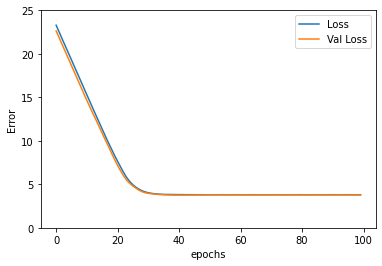

In [176]:
y_loss=hist['loss']
y_val_loss=hist['val_loss']
x_epochs=hist['epoch']
plt.plot(x_epochs,y_loss,label='Loss')
plt.plot(x_epochs,y_val_loss,label='Val Loss')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend()
plt.ylim(0,25);

In [177]:
test_results={}
test_value=model.evaluate(df_test_X['Horsepower'],df_test_y,verbose=None)
test_results['linear HP']=test_value
test_results

{'linear HP': 3.8625190258026123}

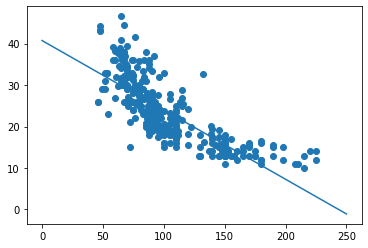

In [178]:
x=tf.linspace(0,250,251)
y=model.predict(x)
plt.plot(x,y);
plt.scatter(df_train_X['Horsepower'],df_train_y);


In [179]:
#Linear regression with multiple inputs
normalizer=layers.Normalization()
normalizer.adapt(np.array(df_train_X))

# create the model
model=keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [180]:
model.compile(loss='mean_absolute_error',optimizer=tf.optimizers.Adam(learning_rate=0.1))

In [181]:
%%time
history=model.fit(df_train_X,
                  df_train_y,
                  epochs=100,
                  verbose=None,
                  validation_split=0.2)

Wall time: 4.81 s


In [182]:
history_loss=pd.DataFrame(history.history)
history_loss['epoch']=history.epoch
history_loss

,loss,val_loss,epoch
0,23.352839,22.633640,0
1,22.498583,21.913260,1
2,21.674101,21.181431,2
3,20.860188,20.451586,3
4,20.032366,19.702265,4
...,...,...,...
95,2.484213,2.636290,95
96,2.479682,2.671264,96
97,2.472660,2.637859,97
98,2.460720,2.638257,98


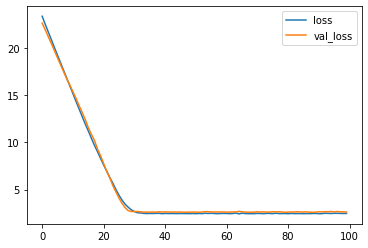

In [183]:
plt.plot(history_loss['loss'],label='loss')
plt.plot(history_loss['val_loss'],label='val_loss')
plt.legend()

In [184]:
test_value=model.evaluate(df_test_X,df_test_y,verbose=None)
test_results['linear all']=test_value
test_results

{'linear HP': 3.8625190258026123, 'linear ': 2.4711925983428955}

In [193]:
#Using deep neural networks

def create_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(units=64,activation='relu'),
        layers.Dense(units=64,activation='relu'),
        layers.Dense(units=1)
    ])
    
    model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

    return model


In [194]:
# using a single feature
#create the normalization layer
hp_normalizer=layers.Normalization(input_shape=[1,],axis=None)
hp_normalizer.adapt(np.array(df_train_X['Horsepower']))

model=create_compile_model(hp_normalizer)
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_30 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_53 (Dense)            (None, 64)                128       
                                                                 
 dense_54 (Dense)            (None, 64)                4160      
                                                                 
 dense_55 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [195]:
history=model.fit(df_train_X['Horsepower'],
df_train_y,
epochs=100,
verbose=0,
validation_split=0.2)

In [196]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist


,loss,val_loss,epoch
0,23.511311,23.170441,0
1,23.258398,22.910707,1
2,22.976336,22.605574,2
3,22.626751,22.221748,3
4,22.190723,21.722939,4
...,...,...,...
95,3.185508,3.740820,95
96,3.195818,3.751882,96
97,3.183226,3.702234,97
98,3.184070,3.708715,98


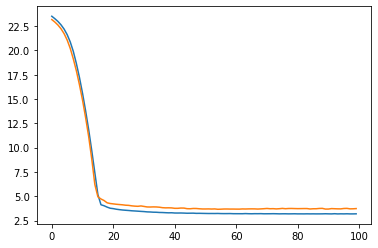

In [197]:
plt.plot(hist['loss'],label='loss')
plt.plot(hist['val_loss'],label='val_loss');

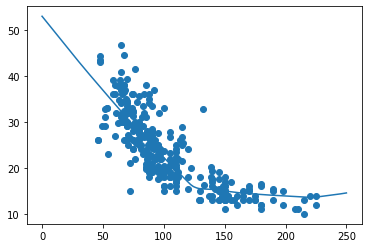

In [200]:
x=tf.linspace(0,250,251)
y=model.predict(x)
plt.plot(x,y);
plt.scatter(df_train_X['Horsepower'],df_train_y);

In [201]:
test_value=model.evaluate(df_test_X['Horsepower'],df_test_y,verbose=None)
test_results['linear HP DNN']=test_value
test_results

{'linear HP': 3.8625190258026123,
 'linear ': 2.4711925983428955,
 'linear HP DNN': 3.231574296951294}

In [202]:
# using all features
#create the normalization layer
hp_normalizer=layers.Normalization(axis=-1)
hp_normalizer.adapt(np.array(df_train_X))

model=create_compile_model(hp_normalizer)
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_31 (Normaliza  (None, 9)                19        
 tion)                                                           
                                                                 
 dense_56 (Dense)            (None, 64)                640       
                                                                 
 dense_57 (Dense)            (None, 64)                4160      
                                                                 
 dense_58 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [203]:
history=model.fit(df_train_X,df_train_y,epochs=100,verbose=None,validation_split=0.2)

In [208]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist

,loss,val_loss,epoch
0,23.578039,23.057564,0
1,22.976772,22.476416,1
2,22.321205,21.803621,2
3,21.539148,20.949884,3
4,20.529257,19.796522,4
...,...,...,...
95,1.666855,2.067135,95
96,1.633528,2.119262,96
97,1.618515,2.078798,97
98,1.630116,2.099508,98


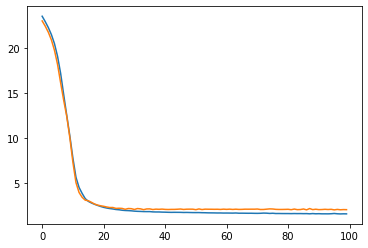

In [211]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss']);

In [213]:
test_value=model.evaluate(df_test_X,df_test_y,verbose=None)
test_results['linear DNN']=test_value
test_results

{'linear HP': 3.8625190258026123,
 'linear ': 2.4711925983428955,
 'linear HP DNN': 3.231574296951294,
 'linear DNN': 1.9801483154296875}

In [223]:
pd.DataFrame(test_results,index=['Mean Abs Error'])

,linear HP,linear,linear HP DNN,linear DNN
Mean Abs Error,3.862519,2.471193,3.231574,1.980148


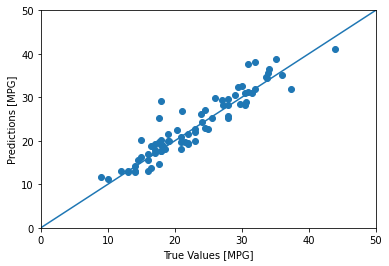

In [238]:
predit_y=model.predict(df_test_X).flatten().reshape(-1,)
plt.scatter(df_test_y, predit_y)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)